# Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Utils

In [2]:
def model_predict(df, features, target, model, pred_c_name):
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.3, random_state = 42)
    model.fit(X_train, y_train)
    X_test[pred_c_name] = model.predict(X_test)
    X_test[target] = y_test
    return X_test, model

def model_evaluate(df, pred, target):
    mean_absolute_error = (abs(df[pred] - df[target])).mean()
    MAPE = (abs((df[target] - df[pred])/df[target])).mean()
    rmse = np.sqrt(((df[pred] - df[target])**2).mean())
    print("RMSE:\t", rmse)
    print("MAE:\t", mean_absolute_error)
    print("MAPE:\t", MAPE)

# Data understanding

In [5]:
housing_file_path = "/data/DataSet_LakasArak.csv"
housing = pd.DataFrame(pd.read_csv(housing_file_path))
housing_clean = housing.copy()

In [6]:
# Check the head of the dataset
housing_clean.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31


In [7]:
housing_clean.shape

(78539, 22)

In [8]:
housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78539 entries, 0 to 78538
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county                   78539 non-null  object 
 1   city                     77980 non-null  object 
 2   postcode                 49585 non-null  float64
 3   property_type            78539 non-null  object 
 4   property_subtype         76880 non-null  object 
 5   property_condition_type  78539 non-null  object 
 6   property_floor           74746 non-null  object 
 7   building_floor_count     36429 non-null  object 
 8   view_type                42878 non-null  object 
 9   orientation              47647 non-null  object 
 10  garden_access            17200 non-null  object 
 11  heating_type             67233 non-null  object 
 12  elevator_type            64388 non-null  object 
 13  room_cnt                 78539 non-null  float64
 14  small_room_cnt        

In [9]:
housing_clean.describe()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
count,49585.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000
mean,1103.358980,1.467666,0.559875,48.440584,1.953182,19.341475,259.599320,44.173684,196334.093240
std,50.769326,0.599840,0.737015,12.716653,4.677227,8.900296,512.351553,47.821006,113305.083861
min,1011.000000,0.000000,0.000000,5.000000,0.000000,0.200000,0.000000,1.000000,4.000000
25%,1064.000000,1.000000,0.000000,40.000000,0.000000,13.200000,42.000000,11.000000,97959.000000
50%,1101.000000,1.000000,0.000000,50.000000,0.000000,16.900000,103.000000,28.000000,196095.000000
75%,1142.000000,2.000000,1.000000,60.000000,3.000000,23.900000,263.000000,61.000000,294516.500000
max,1239.000000,7.000000,4.000000,70.000000,97.000000,99.600000,28096.000000,537.000000,394181.000000


# Data preperation

## N/A values

In [10]:
# Checking Null values
total_number_of_instances = housing_clean.shape[0]
total_number_of_na_instances = housing_clean.isnull().sum()
(total_number_of_na_instances/total_number_of_instances)*100

# what to do with the N/A instances?

,0
county,0.000000
city,0.711748
postcode,36.865761
property_type,0.000000
property_subtype,2.112326
property_condition_type,0.000000
property_floor,4.829448
building_floor_count,53.616675
view_type,45.405467
orientation,39.333325


### Solution 1

In [11]:
# Solution 1: dropping all N/A
housing_no_na = housing_clean.dropna()
housing_no_na.shape

(5682, 22)

### Solution 2

In [12]:
# Solution 2: dropping N/A from a specific column
housing_no_na = housing_clean.dropna(subset=["building_floor_count"])
housing_no_na.shape

(36429, 22)

### Solution 3

In [13]:
# Solution 3: dropping a specific column that contains N/A (or selecting certain features and ignore the rest, but based on what?)
housing_no_na = housing_clean.drop(columns=["building_floor_count"])
housing_no_na.shape

(78539, 21)

### Solution 4

In [ ]:
# selecting certain features and ignore the rest, but based on what?

In [14]:
small_features = ['room_cnt','small_room_cnt','property_area']
target = 'price_created_at'
all_small_columns = small_features + [target]
print(all_small_columns)

housing_clean_small = housing_clean[all_small_columns]
housing_clean_small.shape

['room_cnt', 'small_room_cnt', 'property_area', 'price_created_at']


(78539, 4)

## Outliers

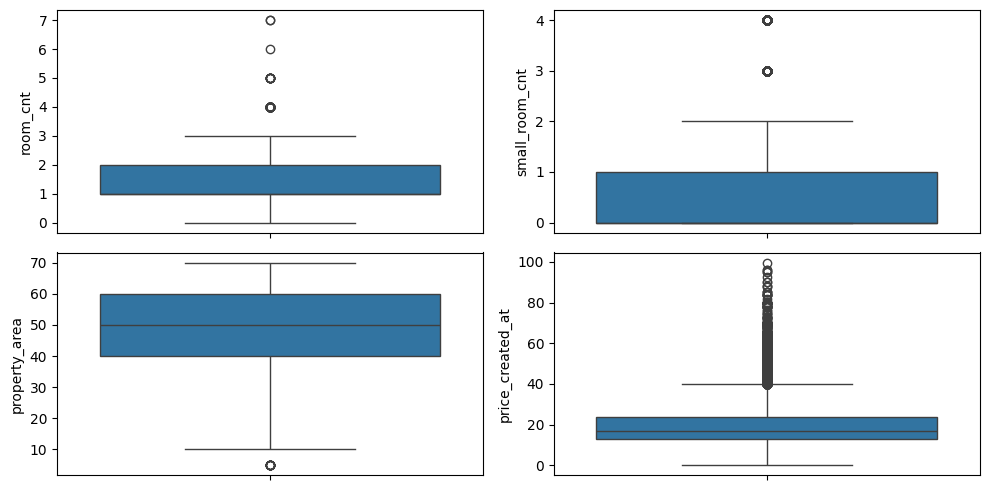

In [15]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(housing_clean_small['room_cnt'], ax = axs[0,0])
plt2 = sns.boxplot(housing_clean_small['small_room_cnt'], ax = axs[0,1])
plt1 = sns.boxplot(housing_clean_small['property_area'], ax = axs[1,0])
plt2 = sns.boxplot(housing_clean_small['price_created_at'], ax = axs[1,1])

plt.tight_layout()

In [ ]:
# Price (price_created_at) has considerable outliers. What to do?

### Solution 1

In [ ]:
# Solution 1: Dropping outliers (we have enough data)

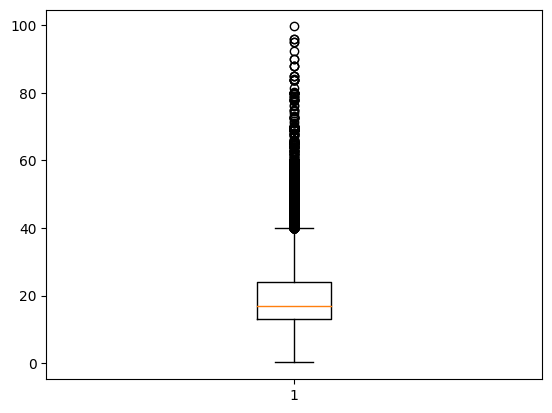

(76254, 4)


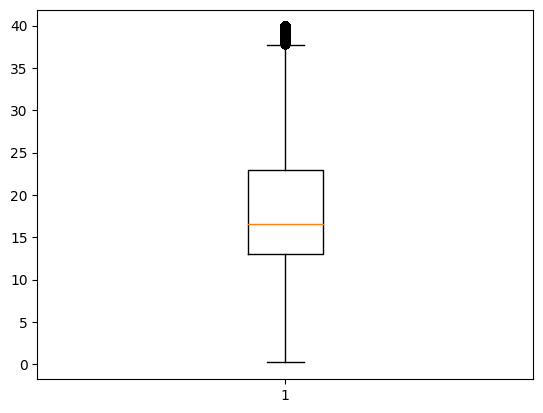

In [16]:
# outlier treatment for price_created_at
plt.boxplot(housing_clean_small.price_created_at)
plt.show()
Q1 = housing_clean_small.price_created_at.quantile(0.25)
Q3 = housing_clean_small.price_created_at.quantile(0.75)
IQR = Q3 - Q1
housing_clean_small = housing_clean_small[(housing_clean_small.price_created_at >= Q1 - 1.5*IQR) & (housing_clean_small.price_created_at <= Q3 + 1.5*IQR)]
print(housing_clean_small.shape)
plt.boxplot(housing_clean_small.price_created_at)
plt.show()

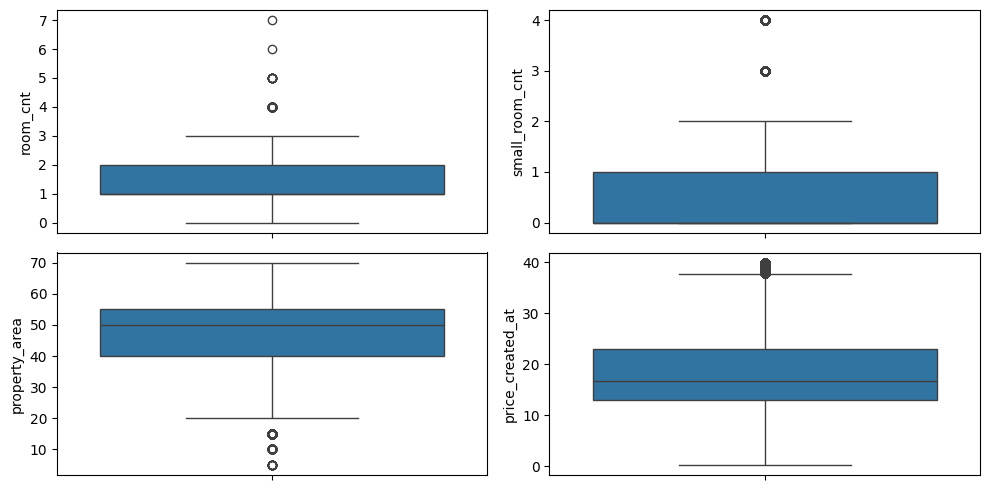

In [17]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(housing_clean_small['room_cnt'], ax = axs[0,0])
plt2 = sns.boxplot(housing_clean_small['small_room_cnt'], ax = axs[0,1])
plt1 = sns.boxplot(housing_clean_small['property_area'], ax = axs[1,0])
plt2 = sns.boxplot(housing_clean_small['price_created_at'], ax = axs[1,1])

plt.tight_layout()

## Different scales

In [ ]:
# It is advised to standardize/normalize so they do not impact the model prediction.

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# housing_clean_small[small_features] = scaler.fit_transform(housing_clean_small[small_features])

# Modeling and Evaluation (1)

## Use LinearRegression model

In [18]:
LR_model = LinearRegression()
small_pred_df, LR_model_trained = model_predict(df=housing_clean_small, features=small_features, target=target, model=LR_model, pred_c_name="pred_small")
small_pred_df.shape

(22877, 5)

In [ ]:
model_evaluate(df=small_pred_df, pred="pred_small", target=target)

RMSE:	 6.428428717435194
MAE:	 5.145038285335024
MAPE:	 0.3149192077482069


In [ ]:
pd.DataFrame({"att":small_features,"coef":LR_model_trained.coef_}).sort_values('coef')

,att,coef
1,small_room_cnt,-3.570300
0,room_cnt,-3.481297
2,property_area,18.893642


## Compare LR to simple averaging

In [ ]:
small_pred_df['pred_avg'] = small_pred_df['price_created_at'].mean()
model_evaluate(df=small_pred_df, pred="pred_avg", target=target)

RMSE:	 7.2745741315724475
MAE:	 5.880633350463065
MAPE:	 0.37631388517952036
